# Solutions for Homework 6 - Machine Learning
**Due: Nov 28** 

***Total Points: 100***

For full points, your code
- must run without errors
- must by *pythonic*
- must be easily understandable, and well documented (either through inline comments or markdown).
- All plots must have clearly and meaningfully labeled axes, unless you are simply plotting arbitrary numbers. Add legends where needed.
- **Use separate markdown cells for any text answers.**
- **Show your work, i.e, print all relevant output.** Remember that having a variable in the last line of a jupyter cell block automatically prints it's value. You can use multiple code blocks for a single question.
- ***Please see the solutions (and related notes) for the previous HWs, as well as the comments on your submissions, before submitting this assignment. We will be less lenient for repeated mistakes.***

Remember to export your Jupyter notebook as a PDF file and upload both to Canvas.
```
File > Save and Export Notebook As... > PDF
```

Run every code block (and make sure the answer if fully visible) before submitting your notebook/PDF.

## Question 0

Part of this HW covers the missed lecture. The examples are derived from the [SciPy lecture Notes](https://scipy-lectures.org/packages/scikit-learn/index.html#parameter-selection-validation-and-testing), which are, in turn, adapted from [Andrew NG's Supervised Machine Learning course on Coursera](https://www.coursera.org/learn/machine-learning).

Selecting the optimal model for your data is vital, and is a piece of the problem that is not often appreciated by machine learning practitioners.

The central question is: If our estimator is underperforming, how should we move forward?
- Use simpler or more complicated model?
- Add more features to each observed data point?
- Add more training samples?

The answer is often counter-intuitive. In particular, Sometimes using a more complicated model will give worse results. Also, sometimes adding training data will not improve your results. The ability to determine what steps will improve your model is what separates the successful machine learning practitioners from the unsuccessful.

We will explore these questions below :)

**Your task:**
Import `numpy` and your plotting package(s) of choice here. You can import the required `sklearn` modules when you need them.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Question 1: Polynomial regression with `sklearn`
*15 points*

We are going to generate some data and fit a polynomial to it by creating a pipeline between `PolynomialFeatures` and `LinearRegression`.
- `PolynomialFeatures` generates a polynomial and its interaction features.
- `make_pipeline` feeds the output of the first step (argument) as the input to the second step (argument).

**Your tasks:**
- Plot the function below, for the given `x_train` values
- Perform a 3rd order polynomial regression using `x_train` values and the 3 functions/classes listed above.
- On the same figure, plot the fit using `x_test` values, and make sure you include the labels and legend. Set the `ylim` for the plot to be `(0, 12)`.

The documentation is your friend!

In [2]:
# Run this code block without changes
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def generate_data(x, err=0.5):
    return np.random.normal(10 - 1. / (x + 0.1), err)

x_train = 10 ** np.linspace(-2, 0, 8)
y_train = generate_data(x_train)
x_test = np.linspace(-0.2, 1.2, 1000)

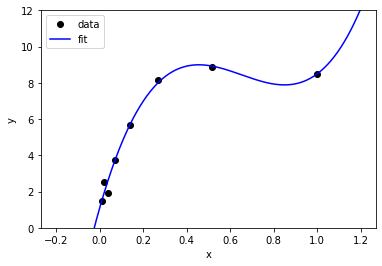

In [3]:
# 3rd order Polynomial fit
model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
model.fit(x_train[:, np.newaxis], y_train)

plt.plot(x_train, y_train, "ok", label="data")
plt.plot(x_test, model.predict(x_test[:, np.newaxis]), 'b', label="fit")
# ax.set_xlim(-0.2, 1.2)
plt.ylim(0, 12)
plt.xlabel('x')  
plt.ylabel('y')
plt.legend();

## Question 2: Hyperparameter selection, over-fitting, and under-fitting
*15 points*

Typically, when selecting a model, there is a trade-off between bias and variance. Both are prediction errors that we want to minimize.
- **Bias** is the error between the average predicted value and the expected (true) value. A model with high bias does not pay enough attention to the training data. It oversimplifies the model, and **underfits** the data, leading to a high error on training and test data. In engineering terms, it has poor *accuracy*.
- **Variance** is the variability of in the predicted values for a given data point, i.e., the spread of our data. A  model with high variance pays too much attention to training data and **overfits** it. Hence, is not able to perform well on data it hasn’t seen before. As a result, it performs very well on training data but has high error rates on test data. In engineering terms, it has poor *precision*.

![precision and bias](https://miro.medium.com/max/640/1*xwtSpR_zg7j7zusa4IDHNQ.png)

**Choosing the right tradeoff between bias and variance leads to the best prediction performance.**

Model choice affects this tradeoff. For example, non-regularized estimators (linear regression) are not biased, but they can display a lot of variance. Highly-regularized models (ridge regression) have little variance, but high bias.

Choosing the right hyperparameter (e.g., `alpha`, which sets the strength of the regularization) also affects the tradeoff. For a specific dataset there is a sweet spot corresponding to the highest complexity that the data can support, depending on the amount of noise and of observations available.

For polynomial regression, the hyperparameter is the `degree` of the polynomial.

**Your tasks:**
- Repeat the problem from Question 1, but use a 1st, 2nd, and 6th order polynomial regression.
- Produce all plots on a single `Figure` with 3 subplots in a single row. Set the `ylim` for each to be `(0, 12)`. Use a single x and y axis label.
- Comment on the results. Which model has a high bias or variance? Which one is an underfit or an overfit?

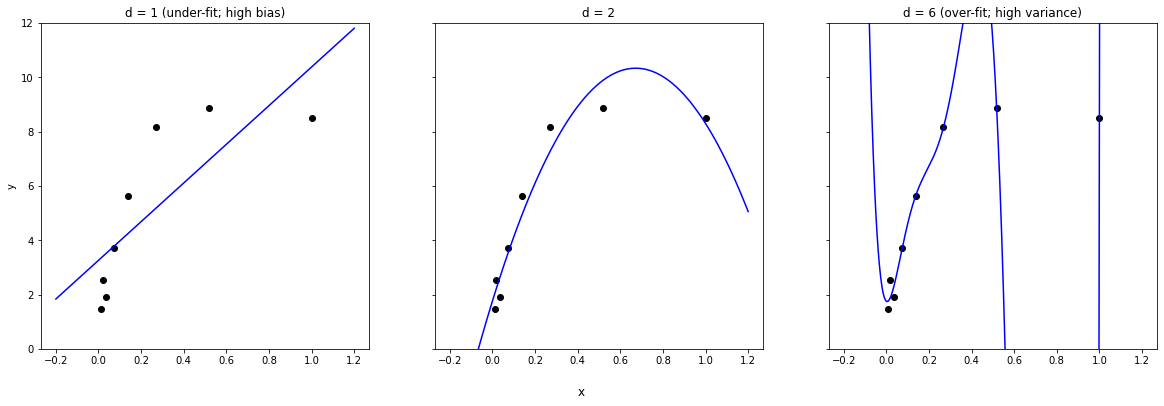

In [4]:
# Polynomial orders
degrees = [1, 2, 6]

# sub-plot titles
titles = ['d = 1 (under-fit; high bias)',
          'd = 2',
          'd = 6 (over-fit; high variance)']

# Regression and plots
fig, axs = plt.subplots(1, 3, figsize=(20,6), sharex=True, sharey=True)
for ax, degree, title in zip(axs, degrees, titles):
    ax.plot(x_train, y_train, "ok")

    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x_train[:, np.newaxis], y_train)
    ax.plot(x_test, model.predict(x_test[:, np.newaxis]), 'b')

    ax.set_ylim(0, 12)
    ax.set_title(title)
    
axs[0].set_ylabel("y")
fig.supxlabel("x");

## Question 3: Validation curves
*15 points*

By plotting your fits above, you should have been able to *qualitatively* determine the bias and variance for each model. Let's now look at *quantifying* these using a validation curve.

**Validation curves shows the model score (e.g., $R^2$) as a function of a *model hyperparameter***. The hyperparameter that controls the model complexity (e.g., `polynomialfeatures__degree`) is varied and the mean model score for the training data and on the test data (cross-validation) is plotted.

Remember:
$$R^2 = \frac{SSR}{SST} = \frac{\text{Explained variability}}{\text{Total variability}}$$

![Regression errors](https://365datascience.com/resources/blog/2018-11-image8-5-1024x495.jpg)

Source: https://365datascience.com/tutorials/statistics-tutorials/sum-squares/

A low model score (i.e., a low explained variance) for both the training set and the cross-validation set indicates that the model under-fits the data. It is too simple. A large difference between the training score and the cross-validation score indicates that the model over-fits the data. It is good at predicting on data it has seen, but bad at predicting on new data.

**Your tasks:**
- Create a `train_test_split` on the `x` and `y` data below, using a `test_size=0.4`. Plot the train and test data, using different colors for each.
- Use `sklearn.model_selection.validation_curve()` to compute the train and test variance for models with polynomial degrees ranging from 1 to 15. Plot the validation curve using the mean variance for each hyperparameter value (i.e., as a function of polynomial degree).
- Comment on the results. Which region of the curve shows underfitting, and which shows over-fitting? What is the best value for the degree hyperparameter?

Hint: Since we are using a pipeline, you can set the `param_name` argument for `validation_curve()` using the double underscore notation: `param_name="polynomialfeatures__degree"`

In [5]:
# Run this code block without changes
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve

x = np.random.random(size=200)
y = generate_data(x, err=1.)

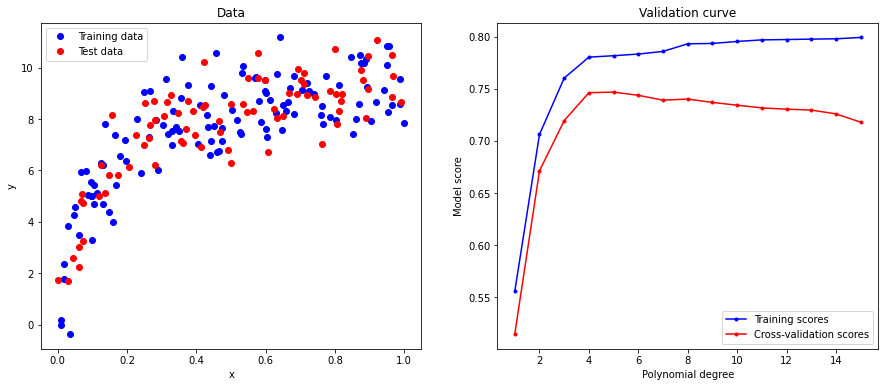

In [6]:
# split into training, validation, and testing sets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15,6))

# show the training and validation sets
axs[0].plot(x_train, y_train, "ob", label='Training data')
axs[0].plot(x_test, y_test, "or", label='Test data')
axs[0].set_xlabel('x')  
axs[0].set_ylabel('y')
axs[0].set_title('Data')
axs[0].legend()

# Polynomial orders
degrees = range(1, 16)

model = make_pipeline(PolynomialFeatures(), LinearRegression())

# The hyperparameter being varied is the degree
train_scores, validation_scores = validation_curve(
    model, x[:, np.newaxis], y,
    param_name='polynomialfeatures__degree',
    param_range=degrees)

# Plot the mean train error and validation error across folds
axs[1].plot(degrees, train_scores.mean(axis=1), ".-b", label='Training scores')
axs[1].plot(degrees, validation_scores.mean(axis=1), ".-r", label='Cross-validation scores')
axs[1].set_xlabel("Polynomial degree")
axs[1].set_ylabel('Model score')
axs[1].set_title('Validation curve')
axs[1].legend();

**Comment:** At low polynomial degrees, the model is underfitting the data leading to low training and CV scores. At high polynomial degrees, the model is overfitting, as seen by the difference between the training and CV score. The best value for the degree hyperparameter is 4.

## Question 4: Learning curves
*15 points*

In general, model complexity (degree of polynomial) can be increased with the number of training points used. Learning curves give a quantitative view into how model performance improves when adding training samples to the data.

**Learning curves show the training and validation score as a function of the *number of training points***. When training on a subset of the training data, the training score is computed using this subset, not the full training set.

The validation score generally increases with a growing training set, while the training score generally decreases with a growing training set. Hence, as the training size increases, they will converge to a single value.
- When the learning curves converge to a low score, we have a *high bias* model. Since this model *under-fits* the data, it makes sense that adding more training data will not help. 
- When the training score is much higher than the validation score, we have a *high-variance* model. Since this model *over-fits* the data, adding more samples to the training set can help improve the model. The training score will continue to decrease, while the cross-validation error will continue to increase, until they meet in the middle.

**Your tasks:**
- Create polynomial models using a 1st and 15th order polynomial, as well as the "best value" for the degree that you determined above.
- Use `sklearn.model_selection.learning_curve()` to generate the learning curves for each model and plot them as subplots using 3 columns. Set the `ylim` for each to be `(0, 1)`. Use a single x and y axis label, and a single legend.
- Comment on the results.

In [7]:
# Run this code block without changes
from sklearn.model_selection import learning_curve

# Use the following for the train_sizes argument in the learning_curve() function
train_sizes=np.logspace(-1, 0, 20)

x = np.random.random(size=200)
y = generate_data(x, err=1.)

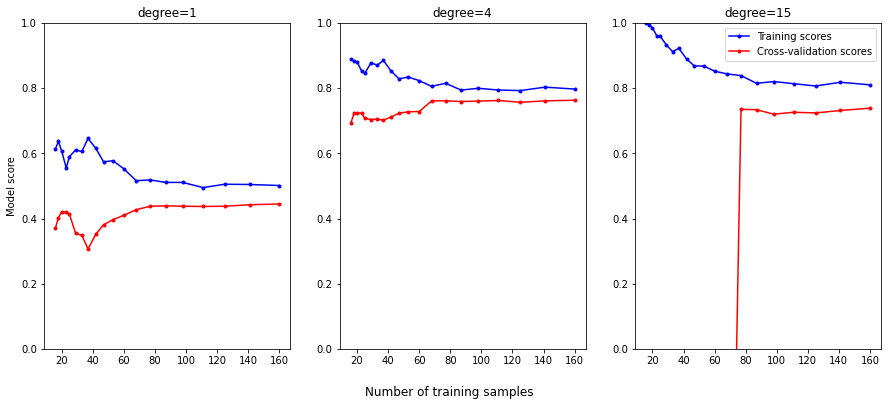

In [8]:
from sklearn.model_selection import learning_curve

# Polynomial orders
degrees = [1, 4, 15]

# Regression and plots
fig, axs = plt.subplots(1, 3, figsize=(15,6), sharex=True)
for ax, degree in zip(axs, degrees):
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())
    train_sizes, train_scores, validation_scores = learning_curve(
        model, x[:, np.newaxis], y,
        train_sizes=train_sizes)
    
    ax.plot(train_sizes, train_scores.mean(axis=1), ".-b", label='Training scores')
    ax.plot(train_sizes, validation_scores.mean(axis=1), ".-r", label='Cross-validation scores')
    ax.set_ylim(0, 1)
    ax.set_title(f'degree={degree}')
fig.supxlabel('Number of training samples')
axs[0].set_ylabel('Model score')
axs[-1].legend();

**Comment:**
At low degrees, the model score is quite low for the training and CV set. At high degrees, the model score is low for lower number of training samples. Hence, a higher number of samples are required for training higher degree polynomials. At `degree=4`. approxmately 80 samples are enough to get a good fit.

## Takeaways

**A high-bias model can be improved by:**
- Using a more sophisticated model (i.e. for a polynomial, increase the degree).
- Decrease regularization in a regularized model.
- Gather more features for each sample.

*Increasing the number of samples, however, does not improve a high-bias model.* In fact, reducing the number of samples will likely have have the same error, but at a lower computational cost.

**A low-bias model can be improved by:**
- Using a less-sophisticated model (i.e. for a polynomial, decrease the degree).
- Increasing regularization in a regularized model.
- Increase the number training samples (by gathering more, not by reducing the test size).

*Gathering more features, however, does not improve a high-variance model.* In fact, using fewer features reduce the effect of over-fitting.

## A final note

Determining hyper-parameters using these validation schemes means that we are fitting the hyper-parameters to the particular validation set. In the same way that parameters can be over-fit to the training set, hyperparameters can be over-fit to the validation set. Because of this, the validation error tends to under-predict the error for new data. To gauge the error of a model on unknown data, using an independent test set is vital.

Hence, it is recommended to split the data into three sets:
- The test set, used to evaluate the expected error of the validated model (usually ~20% of the data, `test_size=0.2`)
- The validation set, used to validate the model (usually ~20% of the data, `cv=4` or `n_splits=4`)
- The training set, used to train the model (usually ~60% of the data)


## Question 5: Regression with Cross-validation
*40 points*

Using everything we have learned in class and the previous questions, let's do some Machine Learning on some material data given in the `elastic_modulus.csv` file. The target variable is the `elastic_modulus`.

**Your tasks:**
- Load the dataset, separate out the target from the features, and visualize the target as a function of each feature.
- Standardize the data, and visualize it again. *HINT: there is a `StandardScaler` function in scikit-learn*
- Reserve a test set using 20% of the original data to check results after optimal regressor is found. *HINT: See "A final note" above.*
- Using the `RidgeCV` and `LassoCV` models, find the optimal hyperparameter value for each model. *HINT: try values of alpha ranging from $10^{-4}$ to $10^2$*
- Using nested cross-validation, try and find the model which provides the best fit. What other metric could you use to select the "best" model?
- With the better of the two models, find the RMS error on the reserved test set. You should not have touched the test set up to this point.

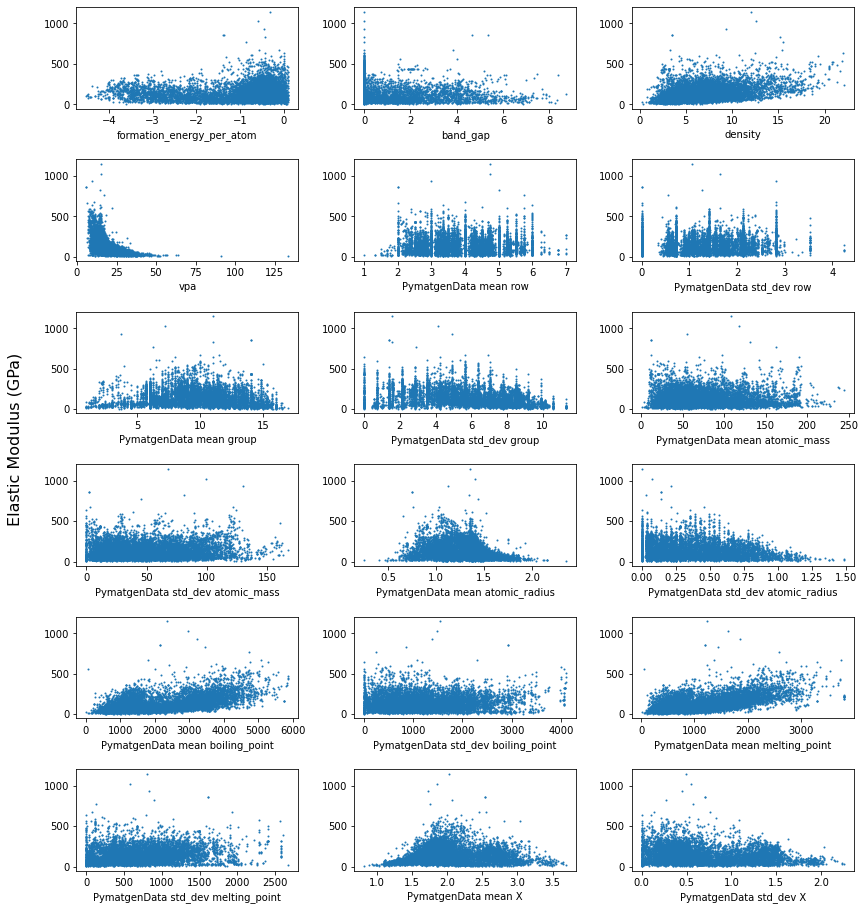

In [9]:
# Fetch data
import pandas as pd

df = pd.read_csv("elastic_modulus.csv")

# Separate target variable from the data
target = "elastic_modulus"
y = df[target]
data = df.drop(target, axis=1)

# Plot
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(left=0.1, right=1, bottom=0, top=1, hspace=0.5, wspace=0.25)
images_per_axis = 4
for idx, feature_name in enumerate(data.columns):
    ax = fig.add_subplot(6, 3, idx + 1)
    ax.scatter(data[feature_name], y, s=1)
    ax.set_xlabel(feature_name)
fig.supylabel("Elastic Modulus (GPa)", size=16);

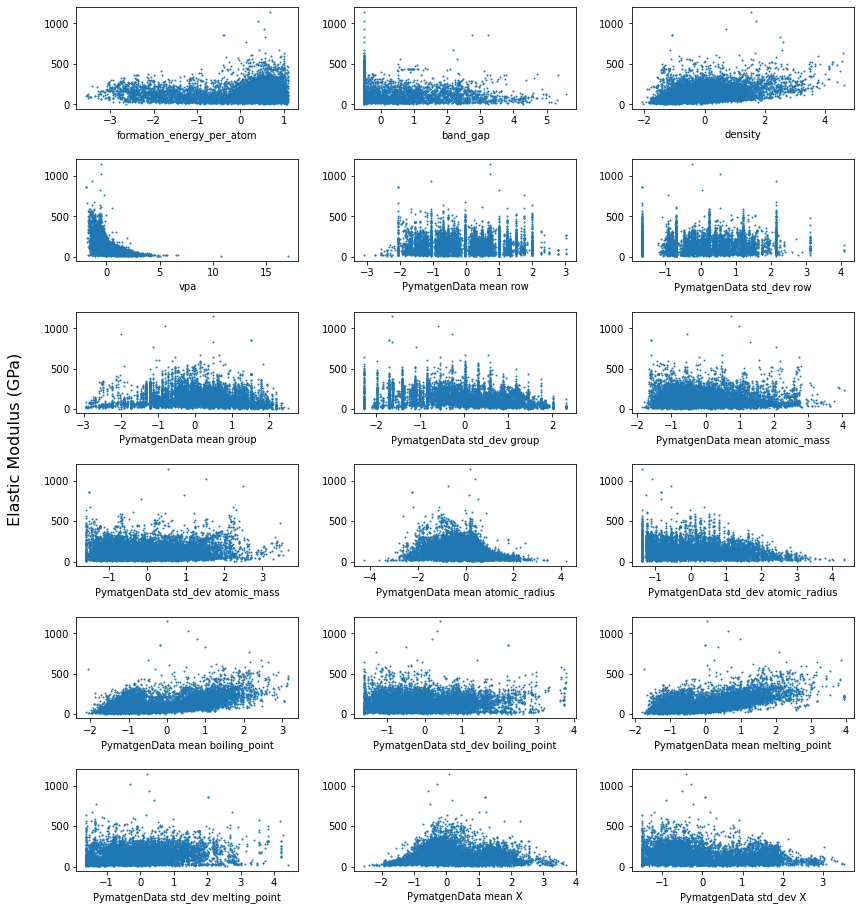

In [10]:
# Standardize data
from sklearn.preprocessing import StandardScaler

feature_names = list(data.columns)
scaler = StandardScaler()
scaler.fit(data)
X = scaler.transform(data)  # returns 2D numpy array

# Plot
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(left=0.1, right=1, bottom=0, top=1, hspace=0.5, wspace=0.25)
images_per_axis = 4
for idx, feature_name in enumerate(feature_names):
    ax = fig.add_subplot(6, 3, idx + 1)
    ax.scatter(X[:, idx], y, s=1)
    ax.set_xlabel(feature_name)
fig.supylabel("Elastic Modulus (GPa)", size=16);

In [11]:
# Reserve 20% of the data for testing
from sklearn import model_selection

# Create a test set containing 20% of the data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

In [12]:
# CV models to find optimum hyperparameter
from sklearn.linear_model import RidgeCV, LassoCV

alphas = np.logspace(-4, 2, 120)

alpha_opt = []
for Model in [RidgeCV, LassoCV]:
    model = Model(alphas=alphas, cv=4).fit(X_train, y_train)
    print(f"{Model.__name__}: {model.alpha_}")
    alpha_opt.append(model.alpha_)

RidgeCV: 3.449968470549716
LassoCV: 0.0001


In [13]:
# Nested cross-validation
from sklearn.model_selection import cross_val_score

for Model in [RidgeCV, LassoCV]:
    scores = model_selection.cross_val_score(Model(alphas=alphas, cv=4), X_train, y_train, cv=4)
    print(f"{Model.__name__}: {np.mean(scores)}")

RidgeCV: 0.6359998557901902
LassoCV: 0.6359888592160159


In [14]:
# Import models
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

Since both models perform equally, let's compare their computational cost:

In [15]:
%%timeit
# Train the Ridge regression model
clf = Ridge(alpha=alpha_opt[0])
clf.fit(X_train, y_train)

1.55 ms ± 257 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [16]:
%%timeit
# Train the Lasso regression model
clf = Lasso(alpha=alpha_opt[1])
clf.fit(X_train, y_train)

63.4 ms ± 4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


**`Ridge`  is the better model for this data.**

In [17]:
# Train the Ridge regression model
clf = Ridge(alpha=alpha_opt[0])
clf.fit(X_train, y_train)

# Test the model
predicted = clf.predict(X_test)
expected = y_test
rms = np.sqrt(np.mean((predicted - expected) ** 2))

# Root Mean Square (RMS) error
print(f"RMS: {rms:.4f} GPa")

RMS: 59.0272 GPa
